<h3> IMPORT REQUIRED LIBRARIES </H3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [2]:
File1=('TCtrain.csv')  
File2=('TCtest.csv')#LOAD FILES

In [3]:
df_train= pd.read_csv(File1)
df_train.shape

(891, 12)

In [4]:
df_test= pd.read_csv(File2)
df_test.shape

(418, 11)

## EXPLORATORY DATA ANALYSIS

#### In this section, we will be :
Cleaning : fill in the missing values.
Plotting : create some interesting charts to get hidden insights out of the data.
Assumptions : we'll formulate hypotheses from the charts.

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
missing_dt = df_train.isnull()    #CHECK FOR NULL VALUES

for column in missing_dt.columns.values.tolist():
    print(column)
    print(missing_dt[column].value_counts())
    print("")
    

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



### So, we have 177 missing values in AGE(train data), 204 values in CABIN and 2 in EMBARKED.

#### SEX-SURVIVAL ANALYSIS

In [10]:
df_train.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

75% FEMALE AND 20% MALE PASSENGERS SURVIVED THE ACCIDENT

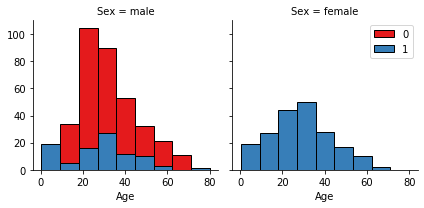

In [11]:
bins = np.linspace(df_train.Age.min(), df_train.Age.max(), 10)
g =sns.FacetGrid(df_train, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins,ec="k")

g.axes[-1].legend()
plt.show()


In [12]:
df_train['Died'] = 1 - df_train['Survived']

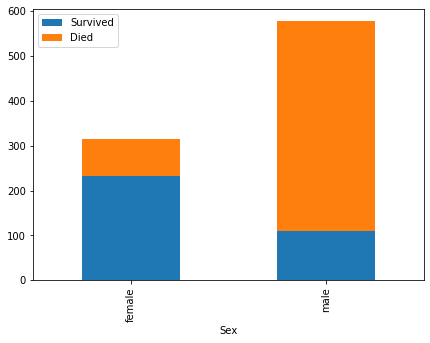

In [13]:
df_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(7, 5),
                                                          stacked=True);

In [14]:
df_train.drop(columns=['Died'], axis =1, inplace= True)

FARE-SURVIVAL ANALYSIS

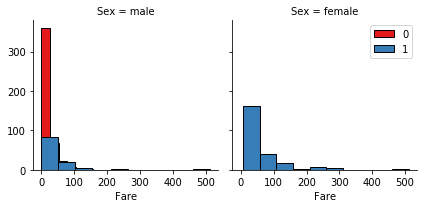

In [15]:
bins = np.linspace(df_train.Fare.min(), df_train.Fare.max(),10)
g = sns.FacetGrid(df_train, col ="Sex", hue ="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Fare', ec="k")

g.axes[-1].legend()
plt.show()

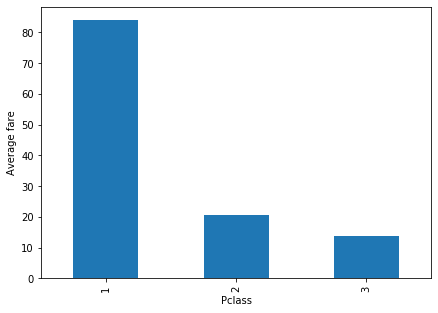

In [16]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
df_train.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(7, 5), ax = ax);

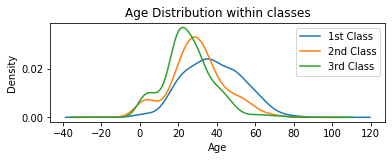

In [17]:
ax1 = plt.subplot2grid((2, 3), (1, 0), colspan=3)
df_train.Age[df_train.Pclass == 1].plot(kind='kde')    
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

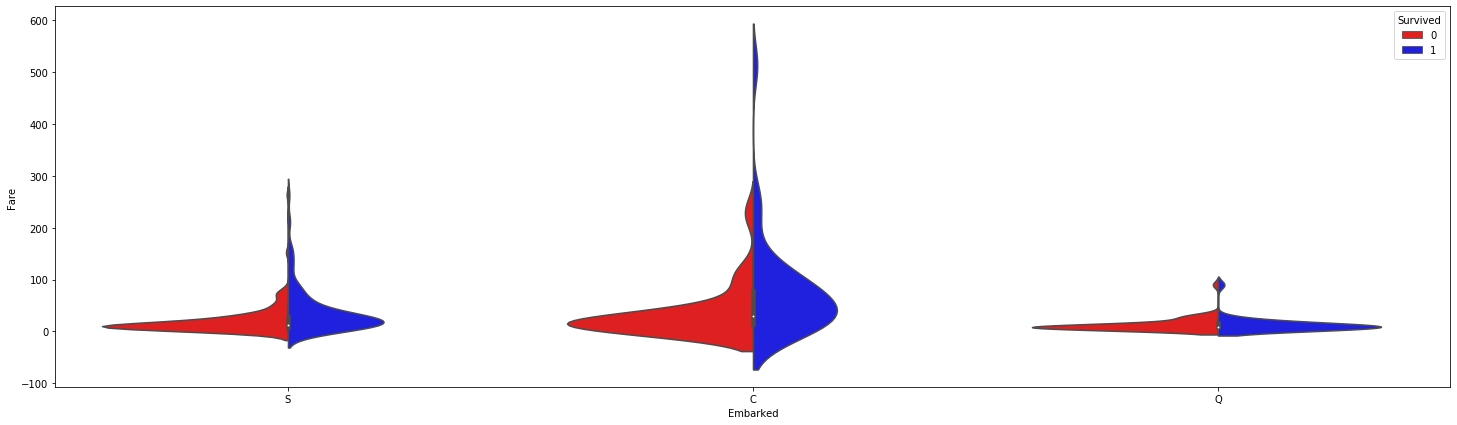

In [18]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=df_train, split=True, palette={0: "r", 1: "b"});

## FEATURE ENGINEERING

Let's create a function to keep a track whecther a function has been processed or not.

In [19]:
def status(feature):
    print ('Processing', feature, ': ok')

In [20]:
def get_cmb_dt():
    File1=('TCtrain.csv')
    File2=('TCtest.csv')
           
    df_test= pd.read_csv(File2)
    target = df_train.Survived
    df_train.drop(['Survived']   ,axis=1, inplace=True)
           
    cmb_dt = df_train.append(df_test)
    cmb_dt.reset_index(inplace = True)
    cmb_dt.drop(['index','PassengerId'], axis= 1,inplace = True)
           
    return cmb_dt

In [21]:
cmb_dt = get_cmb_dt()

#### TITLES PROCESSING

In [22]:
titles = set()
for name in cmb_dt['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [23]:
print (titles)

{'Mlle', 'Dona', 'Mrs', 'Mr', 'Dr', 'Rev', 'Miss', 'Master', 'Mme', 'Ms', 'Lady', 'Don', 'Sir', 'Col', 'Jonkheer', 'the Countess', 'Major', 'Capt'}


In [24]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}


def get_titles():
    # we extract the title from each name
    cmb_dt['Title'] = cmb_dt['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    cmb_dt['Title'] = cmb_dt.Title.map(Title_Dictionary)
    status('Title')
    return cmb_dt

In [25]:
cmb_dt = get_titles()

Processing Title : ok


In [26]:
cmb_dt.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
cmb_dt[cmb_dt['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


#### AGE PROCESSING

In [28]:
print (cmb_dt.Age[:891].isnull().sum())
print (cmb_dt.Age[891:].isnull().sum())

177
86


#### 177 Values missing in training data and 86 Values missing in test data

In [29]:
AgeGp_train = cmb_dt.iloc[:891].groupby(['Sex','Pclass','Title'])
AgeGp_median_train = AgeGp_train.median()
AgeGp_median_train = AgeGp_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [30]:
AgeGp_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


* Grouped by Sex, Pclass, Title  

In [31]:
def fill_age(row):
    criteria = (
        (AgeGp_median_train['Sex'] == row['Sex']) &
        (AgeGp_median_train['Pclass'] == row['Pclass']) &
        (AgeGp_median_train['Title'] == row['Title'])
    )
    return AgeGp_median_train[criteria]['Age'].values[0]

def process_age():
    global cmb_dt
    cmb_dt['Age'] = cmb_dt.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return cmb_dt

In [32]:
cmb_dt = process_age()

Processing age : ok


## We see name are not really useful, so, we'll drop the column

In [33]:
def process_name():
    global cmb_dt
    cmb_dt.drop('Name', axis=1, inplace=True)
    
    title_dummies = pd.get_dummies(cmb_dt['Title'], prefix='Title')
    cmb_dt = pd.concat([cmb_dt, title_dummies], axis=1)
    
    cmb_dt.drop('Title', axis=1, inplace=True)
    
    status('Names')
    return cmb_dt

In [34]:
cmb_dt = process_name()

Processing Names : ok


In [35]:
cmb_dt.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [36]:
def process_fare():
    global cmb_dt
    cmb_dt.Fare.fillna(cmb_dt.iloc[:891].Fare.mean(), inplace=True)
    status('Fare')
    return cmb_dt

In [37]:
df_train = process_fare()

Processing Fare : ok


In [38]:
def process_embarked():
    global cmb_dt
    cmb_dt.Embarked.fillna('S', inplace=True)
    embarked_dummies = pd.get_dummies(cmb_dt['Embarked'], prefix='Embarked')
    cmb_dt = pd.concat([cmb_dt, embarked_dummies], axis=1)
    cmb_dt.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return cmb_dt

In [39]:
cmb_dt = process_embarked()

Processing embarked : ok


In [40]:
cmb_dt.drop(['Cabin'], axis= 1, inplace = True)
cmb_dt.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1


In [41]:
def process_sex():
    global cmb_dt 
    cmb_dt['Sex'] = cmb_dt['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return cmb_dt

In [42]:
cmb_dt = process_sex()

Processing Sex : ok


In [43]:
def process_pclass():
    
    global cmb_dt
    pclass_dummies = pd.get_dummies(cmb_dt['Pclass'], prefix="Pclass")
    
    cmb_dt = pd.concat([cmb_dt, pclass_dummies],axis=1)
    
    cmb_dt.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return cmb_dt

In [44]:
cmb_dt = process_pclass()

Processing Pclass : ok


In [45]:
def process_family():
    
    global cmb_dt
    cmb_dt['FamilySize'] = cmb_dt['Parch'] + df_train['SibSp'] + 1
    
    cmb_dt['Singleton'] = cmb_dt['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    cmb_dt['SmallFamily'] = cmb_dt['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    cmb_dt['LargeFamily'] = cmb_dt['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return cmb_dt

In [46]:
cmb_dt = process_family()

Processing family : ok


In [47]:
cmb_dt.drop(['Ticket'], axis= 1,inplace = True)

In [48]:
cmb_dt.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,1,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,1,1,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0


In [49]:
cmb_dt.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'FamilySize', 'Singleton', 'SmallFamily', 'LargeFamily'],
      dtype='object')

In [50]:
def how_accurate(clf, X, Y, scoring = 'accuracy'):
    Kval = cross_val_score(clf, X, Y, cv=4, scoring=scoring)
    return np.mean(Kval)

In [51]:
def fetch_train_test_target():
    
    train = cmb_dt.iloc[:891]
    test = cmb_dt.iloc[891:]
    
    target = pd.read_csv(File1, usecols = ['Survived'])['Survived'].values
    
    return train, test, target

In [52]:
train, test, target = fetch_train_test_target()

In [53]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

In [54]:
Features = pd.DataFrame()
Features['Feature'] = train.columns
Features['importance'] = clf.feature_importances_
Features.sort_values(by=['importance'], ascending=True, inplace=True)
Features.set_index('Feature', inplace=True)

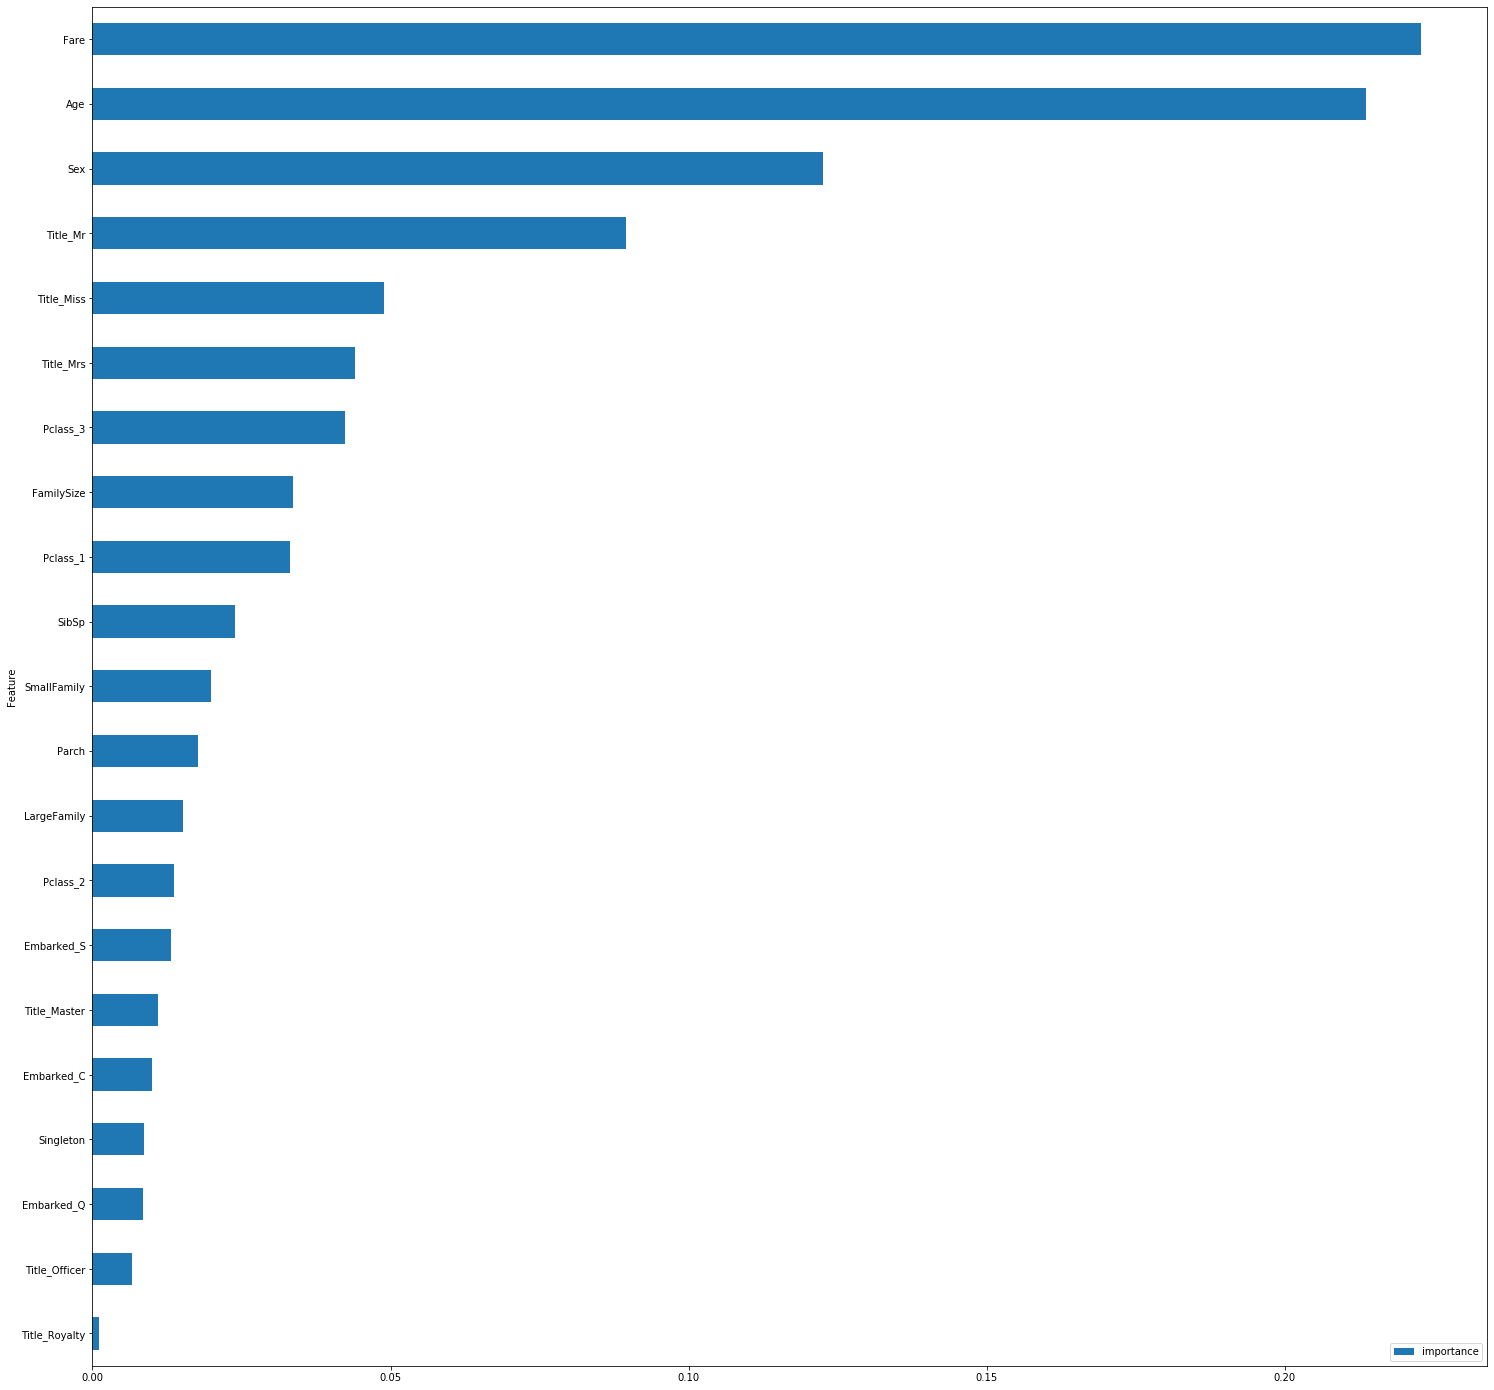

In [55]:
Features.plot(kind='barh', figsize=(25, 25))

In [57]:
model = SelectFromModel(clf, prefit = True)
train_compact = model.transform(train)
print (train_compact.shape)

(891, 5)


In [58]:
test_compact = model.transform(test)
print (test_compact.shape)

(418, 5)


In [59]:
log_reg = LogisticRegression()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [log_reg, rf, gboost]

In [60]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = how_accurate(clf=model, X=train_compact, Y=target, scoring='accuracy')
    print ('CV score = {0}'.format(score))

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.7766710997512567
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>


C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Noorpinder\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in vers

CV score = 0.7822916756843326
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8047385850777107


In [61]:
model = RandomForestClassifier(n_estimators=50, max_features='sqrt')
model.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
yhat = model.predict(test).astype(int)

In [67]:
df_final = pd.DataFrame()
df_final['PassengerId'] = df_test['PassengerId']
df_final['Survived'] = yhat
df_final[['PassengerId','Survived']].to_csv('TCfinal.csv', index=False)

In [68]:
df_final[['PassengerId','Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [69]:
df_final.shape

(418, 2)